In [6]:
plot_expert_trajectory = False

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def curvy_func(x):
    return np.sin(x)

In [9]:
road_stepsize = 0.1
agent_stepsize = 0.5
ratio = agent_stepsize / road_stepsize
assert ratio == int(ratio)
ratio = int(ratio)

In [10]:
xs = np.arange(0, 10 * 2 * np.pi, road_stepsize)
xs_step = np.arange(0, 9 * 2 * np.pi, agent_stepsize)
ys = curvy_func(xs)

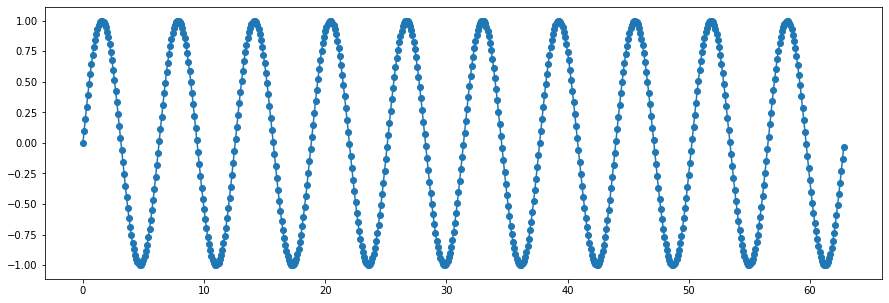

In [11]:
plt.figure(figsize=(15, 5))
plt.scatter(xs, ys)
plt.plot(xs, ys)
plt.show()

In [12]:
stepsize=0.05

In [13]:
y_bins = np.arange(-3, 3+stepsize, stepsize)

In [14]:
entire_traj = np.zeros((len(xs), len(y_bins)))
print(entire_traj.shape)

(629, 121)


In [15]:
# create road
for i, x in enumerate(xs):
    for j in range(len(y_bins) - 1):
        if curvy_func(x) >= y_bins[j] and curvy_func(x) < y_bins[j+1]:
            entire_traj[i][j-10:j+10] = 1
            break

In [16]:
# create labels
states = []
for i, x in enumerate(xs_step):
    for j in range(len(y_bins) - 1):
        if curvy_func(x) >= y_bins[j] and curvy_func(x) < y_bins[j+1]:
            if plot_expert_trajectory:
                entire_traj[i*ratio, j] = 10
            states.append([i*ratio, j])
            break
states = np.array(states)

array([[  0,  60],
       [  5,  69],
       [ 10,  76],
       [ 15,  79],
       [ 20,  78],
       [ 25,  71],
       [ 30,  62],
       [ 35,  52],
       [ 40,  44],
       [ 45,  40],
       [ 50,  40],
       [ 55,  45],
       [ 60,  54],
       [ 65,  64],
       [ 70,  73],
       [ 75,  78],
       [ 80,  79],
       [ 85,  75],
       [ 90,  68],
       [ 95,  58],
       [100,  49],
       [105,  42],
       [110,  40],
       [115,  42],
       [120,  49],
       [125,  58],
       [130,  68],
       [135,  76],
       [140,  79],
       [145,  78],
       [150,  73],
       [155,  64],
       [160,  54],
       [165,  45],
       [170,  40],
       [175,  40],
       [180,  44],
       [185,  53],
       [190,  62],
       [195,  72],
       [200,  78],
       [205,  79],
       [210,  76],
       [215,  69],
       [220,  59],
       [225,  50],
       [230,  43],
       [235,  40],
       [240,  41],
       [245,  48],
       [250,  57],
       [255,  67],
       [260,

In [17]:
# compute x distance between two consecutive states: ratio
# compute width or at least set it using a heuristic: 
y_step_max = np.max(states[:,1][1:] - states[:,1][:-1])

In [27]:
y_step_max

10

In [18]:
def get_obs(agent_coord):
    x, y = agent_coord
    return entire_traj[x:x+ratio, y-2*y_step_max:y+2*y_step_max]

(5, 40)


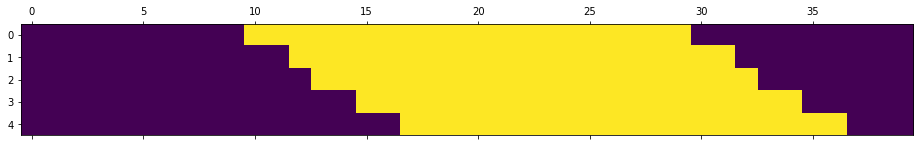

In [19]:
plt.matshow(get_obs(states[11]))
print(get_obs(states[0]).shape)
plt.show()

In [20]:
observations = []
for state in states[:-1]:
    observations.append(get_obs(state))
observations = np.array(observations)
print(observations.shape)

(113, 5, 40)


In [21]:
actions = states[1:] - states[:-1]
print(actions.shape)

(113, 2)


In [22]:
import json
with open('pseudo_driving_dataset.json', 'w+') as json_f:
    json.dump([observations.tolist(), actions.tolist()], json_f)

In [23]:
actions[:10]

array([[  5,   9],
       [  5,   7],
       [  5,   3],
       [  5,  -1],
       [  5,  -7],
       [  5,  -9],
       [  5, -10],
       [  5,  -8],
       [  5,  -4],
       [  5,   0]])

In [25]:
with open('pseudo_driving_track.json', 'w+') as json_f:
    json.dump(entire_traj.tolist(), json_f)

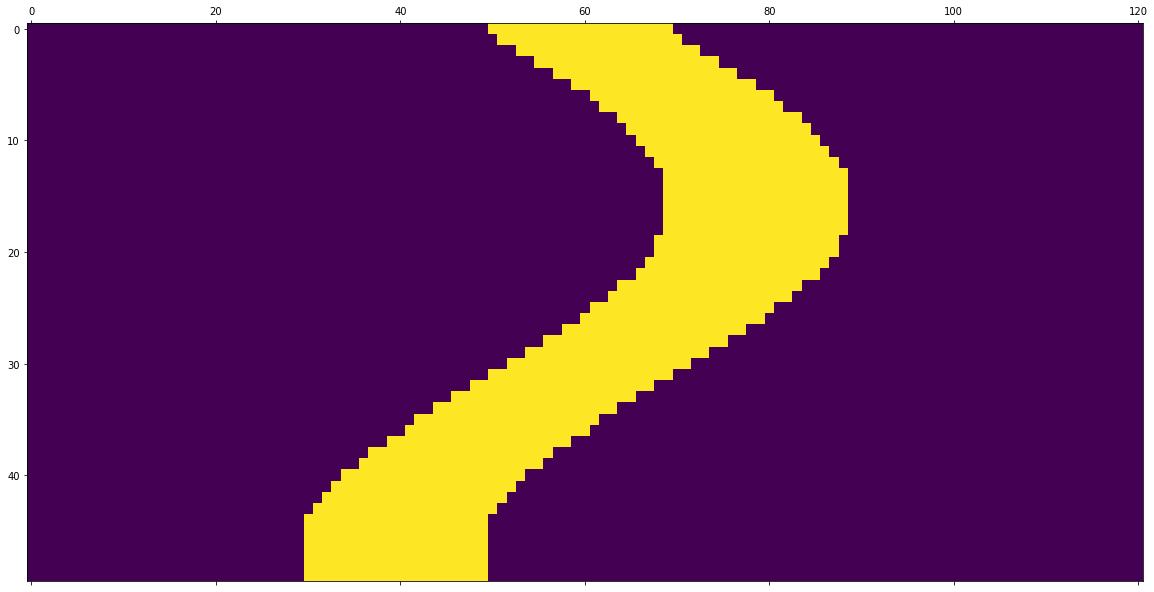

In [24]:
plt.figure(figsize=(20, 10))
plt.matshow(entire_traj[:50], fignum=1, aspect='auto')
plt.show()